In [1]:
# necessary imports
import numpy as np
import matplotlib.pyplot as plt

from core import (find_peaks_volumetric_persistence)
from utils import (plot_spectrum_with_detected_peaks, plot_volumetric_persistence_barcode,
                   plot_candidate_inner_grid,plot_multi_volumetric_persistence_radar_polygon)

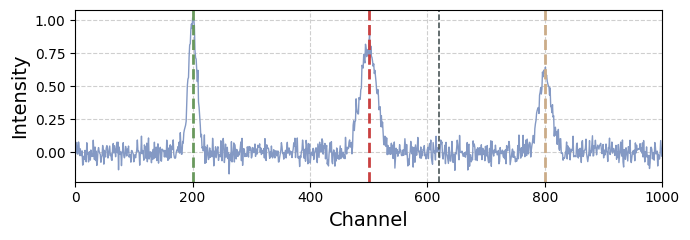

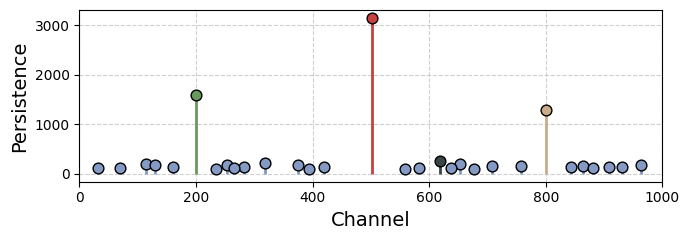

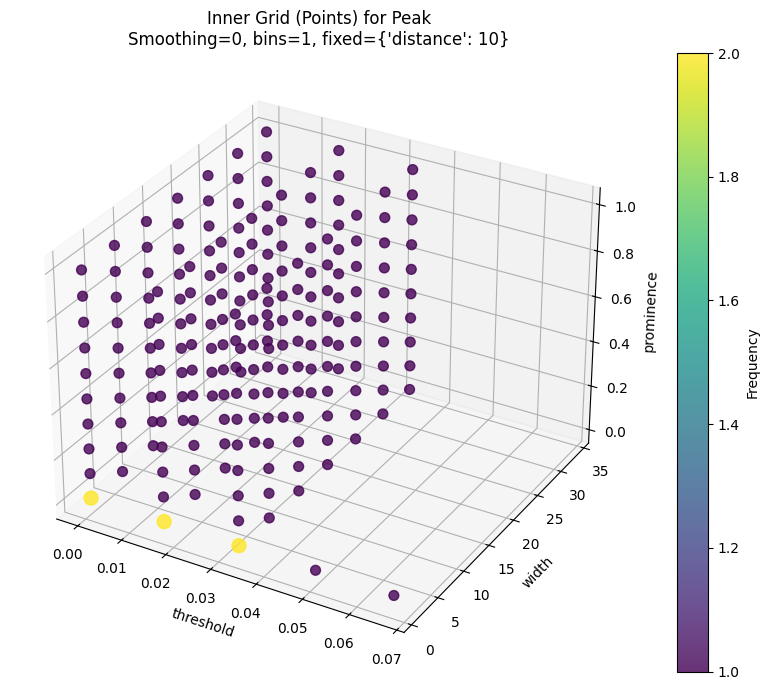

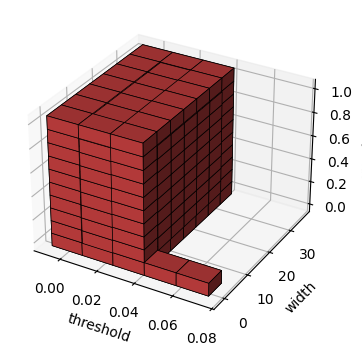

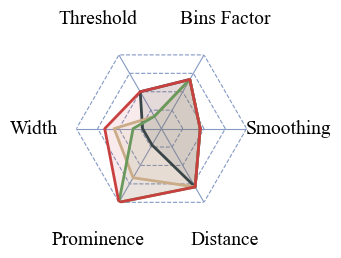

In [2]:
# Example usage:
if __name__ == '__main__':    
    # Generate a synthetic spectrum with three peaks plus noise.
    x = np.linspace(0, 1000, 1000)
    np.random.seed(42)
    spectrum = (np.exp(-((x-200)/10)**2) + 
                0.8 * np.exp(-((x-500)/20)**2) + 
                0.6 * np.exp(-((x-800)/15)**2) +
                0.05 * np.random.randn(len(x)))
    
    # Define ranges for all parameters.
    smoothing_range = [0, 3, 5]           # Moving average window sizes.
    bins_factor_range = [1, 2]            # Aggregation factors.
    threshold_range = np.linspace(0, 0.15, 10)
    width_range = np.linspace(1, 50, 10)
    prominence_range = np.linspace(0.01, 1.0, 10)
    distance_range = np.array([1, 5, 10, 15, 20])
    
    # Run the grid-based peak finder.
    peaks_info = find_peaks_volumetric_persistence(spectrum,
                                                   smoothing_range,
                                                   bins_factor_range,
                                                   threshold_range,
                                                   width_range,
                                                   prominence_range,
                                                   distance_range,
                                                   merging_range=10,
                                                   tol=1,
                                                   parallel=True,
                                                   top_k=30)
        
    COLORS = {
        "spectrum":      "#8499C4",
        "detected_peak": ["#C94040", "#69995D", "#CBAC88", "#394648"],
        "alphas":    [1.0, 1.0, 1.0, 1.0],
        "linewidths": [2.0, 2.0, 2.0, 1.1],
    }
    FONTSIZE = {
        "label":  14,
        "title":  16,
        "legend": 12,
    }
    plot_spectrum_with_detected_peaks(
        x, spectrum, peaks_info,
        top_k=4,
        detected_style='vertical_line',
        COLORS=COLORS,
        FONTSIZE=FONTSIZE
    )

    
    # Generate the barcode persistence plot.
    plot_volumetric_persistence_barcode(peaks_info)
    
    # Example visualization of an inner grid.
    # Here we fix one inner parameter, e.g., 'distance' at a chosen value (e.g., 10),
    # so the free parameters are ['threshold', 'width', 'prominence'].
    fixed_params = {'distance': 10}
    
    # Plot using point cloud view.
    plot_candidate_inner_grid(peaks_info[0], outer_smoothing=peaks_info[0]['grid_params'][0]['smoothing'], 
                              outer_bins=peaks_info[0]['grid_params'][0]['bins_factor'],
                              fixed_params=fixed_params, view_type='points')
    
    # Plot using voxel view (only works if there are exactly 3 free parameters).
    plot_candidate_inner_grid(peaks_info[0], outer_smoothing=peaks_info[0]['grid_params'][0]['smoothing'], 
                              outer_bins=peaks_info[0]['grid_params'][0]['bins_factor'],
                              fixed_params=fixed_params, view_type='voxels', use_frequency_colormap=False,
                              single_color='#C94040')
    
    EXPLORED = {
    'smoothing': (0, 11),
    'bins_factor': (1, 2.5),
    'threshold': (0.0, 0.2),
    'width': (1.0, 50.0),
    'prominence': (0.01, 1.0),
    'distance': (1, 25)
}

    plot_multi_volumetric_persistence_radar_polygon(
    peaks_info[:4],
    explored_ranges=EXPLORED,
    colors=COLORS['detected_peak'],
    labels=[f"Peak {c['peak_index']}" for c in peaks_info[:4]],
    title="",
    grid_color="#8499C4",
    label_pad=20,
    font_size=14
)
